In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
%matplotlib inline

dataset_train = pd.read_csv("AAPL21-22.csv", header = 0, sep = ",")
dataset_train.head()

training_set = dataset_train.iloc[:,1:2].values
#print(training_set)
print(training_set.shape)


(252, 1)


In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

X_train = []
Y_train = []
for i in range(76, 252):
    X_train.append(scaled_training_set[i-76:i, 0])
    Y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(176, 76, 1)


In [3]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [4]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 50, batch_size = 32)


Epoch 1/50
6/6 [==============================] - 6s 109ms/step - loss: 0.0398
Epoch 2/50
6/6 [==============================] - 1s 137ms/step - loss: 0.0183
Epoch 3/50
6/6 [==============================] - 1s 155ms/step - loss: 0.0163
Epoch 4/50
6/6 [==============================] - 1s 100ms/step - loss: 0.0141
Epoch 5/50
6/6 [==============================] - 1s 88ms/step - loss: 0.0123
Epoch 6/50
6/6 [==============================] - 1s 80ms/step - loss: 0.0118
Epoch 7/50
6/6 [==============================] - 1s 86ms/step - loss: 0.0104
Epoch 8/50
6/6 [==============================] - 1s 96ms/step - loss: 0.0103
Epoch 9/50
6/6 [==============================] - 1s 107ms/step - loss: 0.0099
Epoch 10/50
6/6 [==============================] - 1s 116ms/step - loss: 0.0095
Epoch 11/50
6/6 [==============================] - 1s 98ms/step - loss: 0.0090
Epoch 12/50
6/6 [==============================] - 1s 109ms/step - loss: 0.0093
Epoch 13/50
6/6 [==============================] - 1s 

In [5]:
dataset_test = pd.read_csv("AAPL21-22.csv", header = 0, sep = ",")
print(dataset_test[' Open'])
actual_stock_price = dataset_test.iloc[:,1:2].values
dataset_total = pd.concat((dataset_train[' Open'], dataset_test[' Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-76:].values

inputs = inputs.reshape(-1,1)
scaler.clip = False  # add this line
inputs = scaler.transform(inputs)

X_test = []
for i in range(76, 252):
    X_test.append(inputs[i-76:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

0      178.085
1      179.470
2      179.330
3      180.160
4      177.085
        ...   
247    132.430
248    128.360
249    127.720
250    128.890
251    133.520
Name:  Open, Length: 252, dtype: float64


In [6]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)
print(actual_stock_price.shape)

6/6 [==============================] - 1s 44ms/step
(176, 1)
(252, 1)


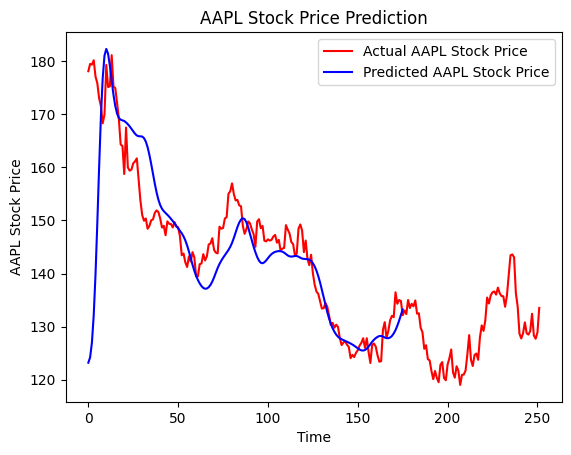

In [7]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual AAPL Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()